In [2]:
## Base library Installation
# Install Baselines for model comparison
!uv pip install catboost xgboost

# Install the datasets library for loading example data
!uv pip install datasets

# Install rich for better and more readable printing
!uv pip install rich


## TabPFN Installation optimized for Google Colab
# Install the TabPFN Client library
!uv pip install tabpfn-client

# Install tabpfn from source
# Clone the repository: shallow for speedup
!git clone --depth 1 https://github.com/PriorLabs/tabpfn

# Speeding up installation in this notebook:
# Remove torch dependency as it is already installed on colab (do not run this in your local setup)
!sed -i "/torch/d" tabpfn/pyproject.toml

# Step 3: Install using the correct directory name 'tabpfn'
!uv pip install -e "tabpfn"

# Install TabPFN extensions for additional functionalities
!git clone https://github.com/PriorLabs/tabpfn-extensions

# Speeding up installation in this notebook:
# Remove torch dependency as it is already installed on colab (do not run this in your local setup)
!sed -i "/torch/d" tabpfn-extensions/pyproject.toml

!uv pip install -e tabpfn-extensions[all]

Using Python 3.11.13 environment at: /usr
Resolved 21 packages in 493ms
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠼ Preparing packages... (0/1)
⠼ Preparing packages... (0/1

In [1]:
import tabpfn
print("TabPFN imported successfully!")

TabPFN imported successfully!


In [2]:
# Standard Library Imports

# TabPFN and Extensions

try:
    from tabpfn import TabPFNClassifier, TabPFNRegressor
    from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import (
        AutoTabPFNClassifier,
    )
except ImportError:
    raise ImportError(
        "Warning: Could not import TabPFN / TabPFN extensions. Please run installation above and restart the session afterwards (Runtime > Restart Session)."
    )

# Data Science & Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# Other ML Models
from catboost import CatBoostClassifier, CatBoostRegressor

# Notebook UI/Display
from IPython.display import Markdown, display
from rich.console import Console
from rich.panel import Panel
from rich.prompt import Prompt
from rich.rule import Rule
from sklearn.compose import make_column_selector, make_column_transformer

# Scikit-Learn: Data & Preprocessing
from sklearn.datasets import fetch_openml, load_breast_cancer

# Scikit-Learn: Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from xgboost import XGBClassifier, XGBRegressor

# This transformer will be used to handle categorical features for the baseline models
column_transformer = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
        make_column_selector(dtype_include=["object", "category"]),
    ),
    remainder="passthrough",
)

In [3]:
from sklearn.utils import shuffle
from pathlib import Path

In [4]:
def split_data(X, Y, p = 0.8, seed = 123456):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = p, random_state = seed)
    return X_train, X_test, Y_train, Y_test

In [5]:
def performance_eval(Y_pred, Y_test):
    Y_pred = np.array(Y_pred)
    Y_test = np.array(Y_test)
    MAE = np.mean(np.abs(Y_pred - Y_test))
    RMSE = np.sqrt(np.mean((Y_pred - Y_test)**2))
    MAPE = np.mean(np.abs(Y_test - Y_pred) / ((np.abs(Y_test) + np.abs(Y_pred)) / 2)) * 100

    #accuracy = np.mean(Y_pred == Y_test) * 100

    return MAE, RMSE, MAPE

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Base

ICL4000

In [53]:
# Set up the data directory path
DATA_DIR = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2")

In [ ]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_base.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_base.csv")

In [ ]:
df

,csv,mae,rmse,mape
0,/content/drive/My Drive/tabPFN_data/linear_exp...,0.116431,0.389478,2.143777
1,/content/drive/My Drive/tabPFN_data/linear_exp...,0.104303,0.130838,2.308963
2,/content/drive/My Drive/tabPFN_data/linear_exp...,0.102707,0.134133,2.119487
3,/content/drive/My Drive/tabPFN_data/linear_exp...,0.086523,0.118739,2.260998
4,/content/drive/My Drive/tabPFN_data/linear_exp...,0.088582,0.112392,3.500569
...,...,...,...,...
995,/content/drive/My Drive/tabPFN_data/linear_exp...,0.093152,0.115417,2.969915
996,/content/drive/My Drive/tabPFN_data/linear_exp...,0.093385,0.127502,2.368307
997,/content/drive/My Drive/tabPFN_data/linear_exp...,0.081944,0.107539,2.015369
998,/content/drive/My Drive/tabPFN_data/linear_exp...,0.098313,0.124965,2.268969


In [57]:
df = pd.read_csv(DATA_DIR / "results_rowOrder_fewshot10.csv")
df["mae"][:100].describe()

,mae
count,100.000000
mean,1.111948
std,0.307509
min,0.422090
25%,0.911799
50%,1.112821
75%,1.281054
max,2.482564


ICL10

In [13]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:10,:]
    Y_train = Y_train[:10]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_base_fewshot10.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_base_fewshot10.csv")

/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm

ICL20

In [15]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:20,:]
    Y_train = Y_train[:20]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_base_fewshot20.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_base_fewshot20.csv")

/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm

ICL500

In [16]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:500,:]
    Y_train = Y_train[:500]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_base_fewshot500.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_base_fewshot500.csv")

## Row Order

ICL4000

In [ ]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train, Y_train = shuffle(X_train, Y_train, random_state=123456)

    model_row = TabPFNRegressor(random_state=123456)
    model_row.fit(X_train, Y_train)
    y_pred = model_row.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_rowOrder.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_rowOrder.csv")

In [ ]:
df

,csv,mae,rmse,mape
0,/content/drive/My Drive/tabPFN_data/linear_exp...,0.116028,0.385564,2.142260
1,/content/drive/My Drive/tabPFN_data/linear_exp...,0.105003,0.132267,2.332470
2,/content/drive/My Drive/tabPFN_data/linear_exp...,0.102337,0.133577,2.115820
3,/content/drive/My Drive/tabPFN_data/linear_exp...,0.086595,0.118547,2.265478
4,/content/drive/My Drive/tabPFN_data/linear_exp...,0.088973,0.112360,3.504979
...,...,...,...,...
995,/content/drive/My Drive/tabPFN_data/linear_exp...,0.092295,0.114690,2.957135
996,/content/drive/My Drive/tabPFN_data/linear_exp...,0.093109,0.128055,2.359052
997,/content/drive/My Drive/tabPFN_data/linear_exp...,0.083323,0.108347,2.035877
998,/content/drive/My Drive/tabPFN_data/linear_exp...,0.098438,0.125333,2.276191


ICL10

In [17]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:10,:]
    Y_train = Y_train[:10]
    X_train, Y_train = shuffle(X_train, Y_train, random_state=123456)

    model_row = TabPFNRegressor(random_state=123456)
    model_row.fit(X_train, Y_train)
    y_pred = model_row.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_rowOrder_fewshot10.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_rowOrder_fewshot10.csv")

/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm

ICL20

In [18]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:20,:]
    Y_train = Y_train[:20]
    X_train, Y_train = shuffle(X_train, Y_train, random_state=123456)

    model_row = TabPFNRegressor(random_state=123456)
    model_row.fit(X_train, Y_train)
    y_pred = model_row.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_rowOrder_fewshot20_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_rowOrder_fewshot20_100.csv")

/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)


ICL500

In [20]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:500,:]
    Y_train = Y_train[:500]
    X_train, Y_train = shuffle(X_train, Y_train, random_state=123456)

    model_row = TabPFNRegressor(random_state=123456)
    model_row.fit(X_train, Y_train)
    y_pred = model_row.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_rowOrder_fewshot500_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_rowOrder_fewshot500_100.csv")

## Num_Digits

ICL4000

In [38]:
DATA_DIR = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_10_digits")

In [ ]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_10_digits.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_10_digits.csv")

ICL10

In [22]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:10,:]
    Y_train = Y_train[:10]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_10_digits_fewshot10_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_10_digits_fewshot10_100.csv")

ICL20

In [23]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:20,:]
    Y_train = Y_train[:20]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_10_digits_fewshot20_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_10_digits_fewshot20_100.csv")

/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)


ICL500

In [24]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:500,:]
    Y_train = Y_train[:500]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_10_digits_fewshot500_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_10_digits_fewshot500_100.csv")

## Column_Order

ICL4000

In [41]:
DATA_DIR = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_shuffle")

In [ ]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:1000]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_shuffle.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_shuffle.csv")

ICL10

In [26]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:10,:]
    Y_train = Y_train[:10]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_shuffle_fewshot10_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_shuffle_fewshot10_100.csv")

ICL20

In [27]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:20,:]
    Y_train = Y_train[:20]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_shuffle_fewshot20_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_shuffle_fewshot20_100.csv")

/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)
/content/tabpfn/src/tabpfn/architectures/base/preprocessing.py:315: RuntimeWarning: overflow encountered in cast
  x_inv[pos] = np.expm1(np.log(x[pos] * lmbda + 1) / lmbda)


ICL500

In [28]:
from pathlib import Path
#DATA_DIR = Path("Tabpfn_data/linear_exp_all_positive2")


rows = []
files = sorted(DATA_DIR.glob("dataset_*.csv"))[:100]
for csv_path in files:
#for csv_path in sorted(DATA_DIR.glob("dataset_*.csv")):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=["Y"])
    Y = df["Y"]
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    X_train = X_train.iloc[:500,:]
    Y_train = Y_train[:500]

    model = TabPFNRegressor(random_state=123456)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    MAE, RMSE, MAPE = performance_eval(y_pred, Y_test)

    rows.append({"csv": str(csv_path), "mae": MAE, "rmse": RMSE, "mape": MAPE})

df = pd.DataFrame(rows)
df.to_csv(DATA_DIR / "results_shuffle_fewshot500_100.csv", index=False)
df[["mae", "rmse", "mape"]].describe().to_csv(DATA_DIR / "summary_statistics_shuffle_fewshot500_100.csv")

## Visualize

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
DATA_DIR1 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2")
DATA_DIR2 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_shuffle")
DATA_DIR3 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_10_digits")

CONFIG_FILES = {
    "Base":    DATA_DIR1 / "results_base.csv",
    "Variable Order": DATA_DIR2 / "results_shuffle.csv",
    "Number of Digits": DATA_DIR3 / "results_10_digits.csv",
    "Row Order": DATA_DIR1 / "results_rowOrder.csv",
}

# MAE from each file
labels, data = [], []
missing = []
for label, path in CONFIG_FILES.items():
    if not path.exists():
        missing.append(path.name)
        continue
    df = pd.read_csv(path)
    if "mae" not in df.columns:
        raise KeyError(f"'mae' column not found in {path.name}")
    labels.append(label)
    data.append(df["mae"].dropna().values)

/tmp/ipython-input-138433748.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(


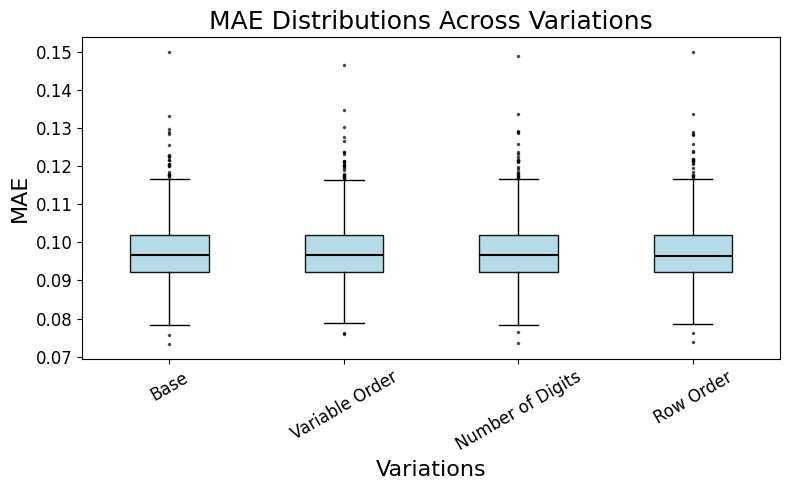

Saved figure: /content/drive/My Drive/tabPFN_data/linear_exp_all_positive2/mae_boxplot_4files.png


In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs = np.atleast_1d(axs)

axs[0].boxplot(
    data,
    labels=labels,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.9),
    medianprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', markersize=1.5, markerfacecolor='black', alpha=0.6),
    showfliers=True
)
axs[0].set_xlabel('Variations', fontsize=16)
axs[0].set_ylabel('MAE', fontsize=16)
axs[0].set_title('MAE Distributions Across Variations', fontsize=18)
axs[0].tick_params(axis='x', rotation=30, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

plt.tight_layout()
out_path = DATA_DIR1 / "mae_boxplot_4files.png"
plt.savefig(out_path, dpi=150)
plt.show()
print("Saved figure:", out_path)

In [ ]:
def load_results(path: Path, label: str):
    if not path.exists():
        raise FileNotFoundError(f"Missing file for {label}: {path}")
    df = pd.read_csv(path)
    if "csv" not in df.columns or "mae" not in df.columns:
        raise KeyError(f"{path.name} must contain 'csv' and 'mae' columns.")
    out = df.copy()
    out["dataset"] = out["csv"].apply(lambda s: Path(str(s)).name)
    return out[["dataset", "mae"]].rename(columns={"mae": f"mae_{label}"})

/tmp/ipython-input-2537013826.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(


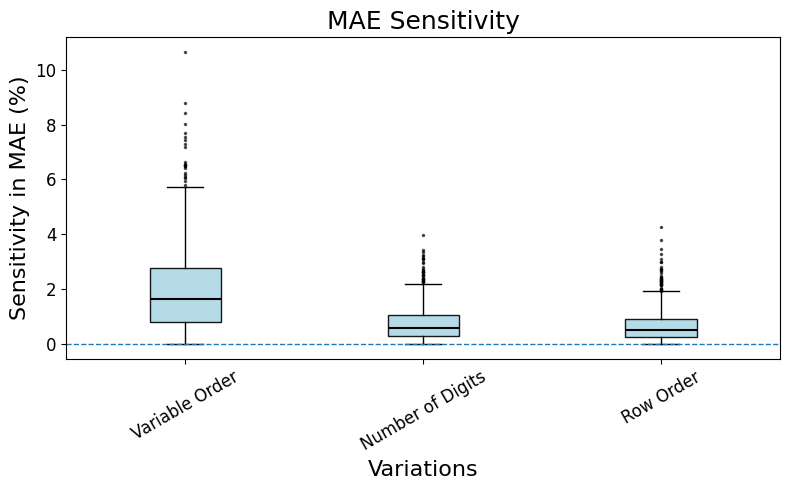

Saved figure: /content/drive/My Drive/tabPFN_data/linear_exp_all_positive2/mae_sensitivity_boxplot_4files.png


In [ ]:
base_df = load_results(CONFIG_FILES["Base"], "Base")

labels, data = [], []
missing = []

for label, path in CONFIG_FILES.items():
    if label == "Base":
        continue
    if not path.exists():
        missing.append(path.name)
        continue

    var_df = load_results(path, label)
    merged = base_df.merge(var_df, on="dataset", how="inner")
    if merged.empty:
        print(f"Warning: No overlapping datasets between Base and {label}. Skipping.")
        continue

    base_mae = merged["mae_Base"].values.astype(float)
    var_mae  = merged[f"mae_{label}"].values.astype(float)

    # sensitivity (%) = 100 * |(variant - base)| / base
    sens_pct = 100.0 * abs((var_mae - base_mae)) / base_mae

    labels.append(label)
    data.append(sens_pct)

fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs = np.atleast_1d(axs)

axs[0].boxplot(
    data,
    labels=labels,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.9),
    medianprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', markersize=1.5, markerfacecolor='black', alpha=0.6),
    showfliers=True
)
axs[0].axhline(0, linestyle="--", linewidth=1)
axs[0].set_xlabel('Variations', fontsize=16)
axs[0].set_ylabel('Sensitivity in MAE (%)', fontsize=16)
axs[0].set_title('MAE Sensitivity', fontsize=18)
axs[0].tick_params(axis='x', rotation=30, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

plt.tight_layout()
out_path = DATA_DIR1 / "mae_sensitivity_boxplot_4files.png"
plt.savefig(out_path, dpi=150)
plt.show()
print("Saved figure:", out_path)

Update:

/tmp/ipython-input-2176919177.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-2176919177.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-2176919177.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-2176919177.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


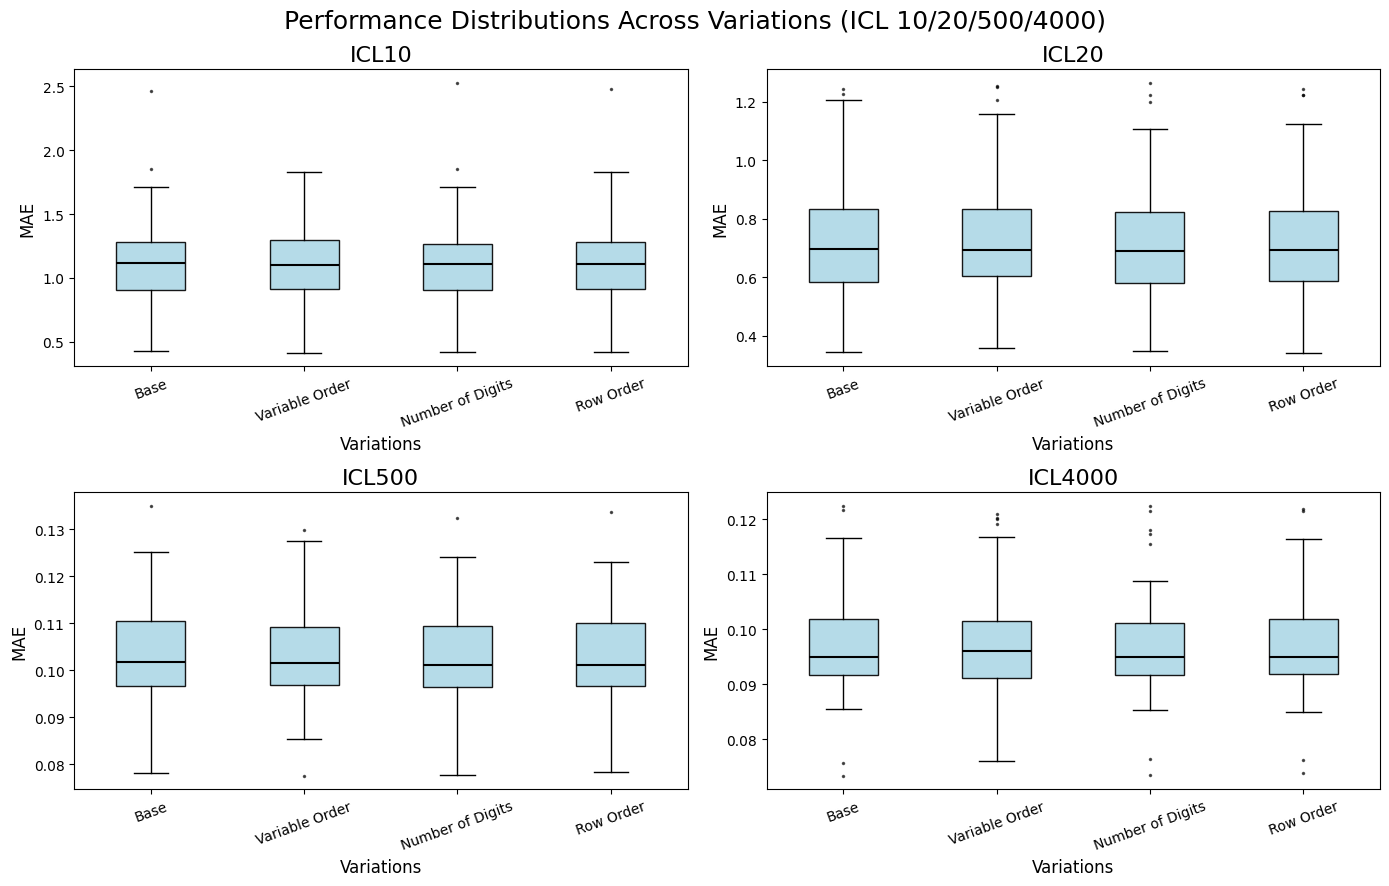

Saved figure: /content/drive/My Drive/tabPFN_data/linear_exp_all_positive2/mae_boxplot_baseline_icl.png


In [51]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR1 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2")
DATA_DIR2 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_shuffle")
DATA_DIR3 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_10_digits")

CONFIG_BASE = {
    "Base":            (DATA_DIR1, "results_base"),
    "Variable Order":  (DATA_DIR2, "results_shuffle"),
    "Number of Digits":(DATA_DIR3, "results_10_digits"),
    "Row Order":       (DATA_DIR1, "results_rowOrder"),
}

def _pick_file(base_dir: Path, stem: str, shots: int | None) -> Path | None:
    """
    If shots is None: return base_dir/<stem>.csv
    If shots is 10/20/500: find a file containing 'fewshot{shots}' in its name.
    """
    if shots is None:
        p = base_dir / f"{stem}.csv"
        return p if p.exists() else None
    # few-shot: search by pattern
    pattern = f"{stem}*fewshot{shots}*.csv"
    matches = sorted(base_dir.glob(pattern))
    return matches[-1] if matches else None

def _load_mae_series(p: Path) -> np.ndarray:
    """
    If filename (without extension) does NOT end with '_100', use only the first 100 rows.
    """
    df = pd.read_csv(p)
    if "mae" not in df.columns:
        raise KeyError(f"'mae' column not found in {p.name}")
    # Apply [:100] if the file name doesn't end with '_100'
    if not p.stem.endswith("_100"):
        df = df.iloc[:100]
    return df["mae"].dropna().values

def build_panel_data(shots: int | None):
    labels, data = [], []
    missing = []
    for label, (base_dir, stem) in CONFIG_BASE.items():
        fp = _pick_file(base_dir, stem, shots)
        if fp is None or not fp.exists():
            missing.append((label, shots, f"{stem}"))
            continue
        try:
            series = _load_mae_series(fp)
        except Exception as e:
            missing.append((label, shots, f"{fp.name} -> {e}"))
            continue
        labels.append(label)
        data.append(series)
    return labels, data, missing

PANELS = [
    (10,   "ICL10"),
    (20,   "ICL20"),
    (500,  "ICL500"),
    (None, "ICL4000"),
]

fig, axs = plt.subplots(2, 2, figsize=(14, 9))
axs = axs.ravel()

all_missing = []

for ax, (shots, title) in zip(axs, PANELS):
    labels, data, missing = build_panel_data(shots)
    all_missing.extend(missing)

    if data:
        ax.boxplot(
            data,
            labels=labels,
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.9),
            medianprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', markersize=1.5, markerfacecolor='black', alpha=0.6),
            showfliers=True
        )
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('Variations', fontsize=12)
        ax.set_ylabel('MAE', fontsize=12)
        ax.tick_params(axis='x', rotation=20, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
    else:
        ax.axis('off')
        ax.text(0.5, 0.5, f"No files found for {title}", ha='center', va='center', fontsize=12)

fig.suptitle('Performance Distributions Across Variations (ICL 10/20/500/4000)', fontsize=18)
fig.tight_layout()

out_path = DATA_DIR1 / "mae_boxplot_baseline_icl.png"
plt.savefig(out_path, dpi=150)
plt.show()

if all_missing:
    print("Missing or errored files (label, shots, stem/info):")
    for m in all_missing:
        print("  ", m)
print("Saved figure:", out_path)


/tmp/ipython-input-101996312.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-101996312.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-101996312.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-101996312.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


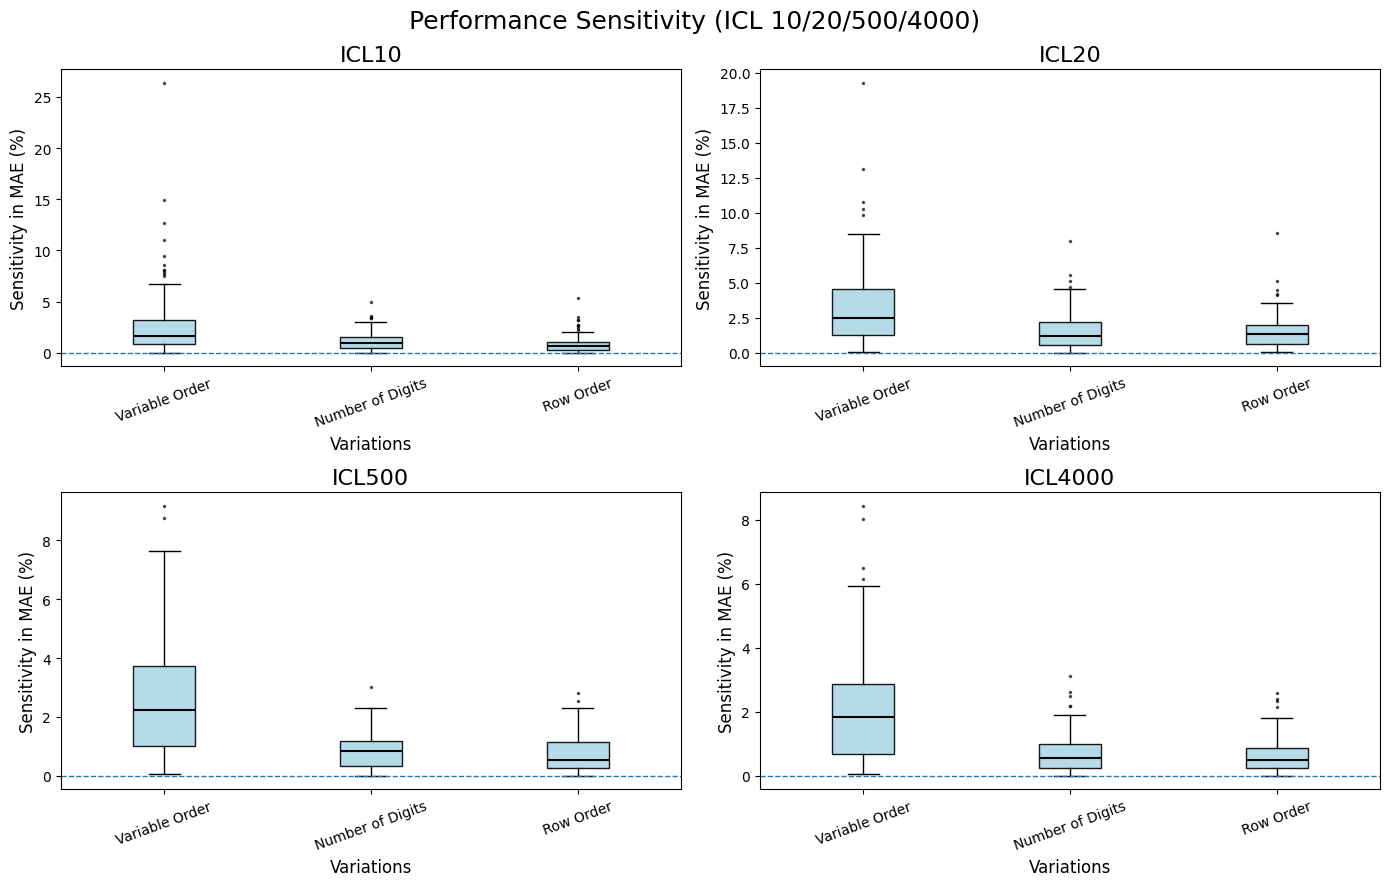

Saved figure: /content/drive/My Drive/tabPFN_data/linear_exp_all_positive2/mae_sensitivity_boxplot_panels.png


In [60]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Directories ===
DATA_DIR1 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2")
DATA_DIR2 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_shuffle")
DATA_DIR3 = Path("/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_10_digits")

# Map panel labels to their (directory, base filename stem)
CONFIG_BASE = {
    "Base":             (DATA_DIR1, "results_base"),
    "Variable Order":   (DATA_DIR2, "results_shuffle"),
    "Number of Digits": (DATA_DIR3, "results_10_digits"),
    "Row Order":        (DATA_DIR1, "results_rowOrder"),
}

def _pick_file(base_dir: Path, stem: str, shots: int | None) -> Path | None:
    """
    If shots is None: return base_dir/<stem>.csv
    If shots is 10/20/500: find the newest file containing 'fewshot{shots}' in its name.
    """
    if shots is None:
        p = base_dir / f"{stem}.csv"
        return p if p.exists() else None
    matches = sorted(base_dir.glob(f"{stem}*fewshot{shots}*.csv"))
    return matches[-1] if matches else None

def _load_results(path: Path, label: str) -> pd.DataFrame:
    """
    If filename (without extension) does NOT end with '_100', read only the first 100 rows.
    """
    if path is None or not path.exists():
        raise FileNotFoundError(f"Missing file for {label}: {path}")
    nrows = None if path.stem.endswith("_100") else 100
    df = pd.read_csv(path, nrows=nrows)
    if "csv" not in df.columns or "mae" not in df.columns:
        raise KeyError(f"{path.name} must contain 'csv' and 'mae' columns.")
    out = df.copy()
    out["dataset"] = out["csv"].apply(lambda s: Path(str(s)).name)
    return out[["dataset", "mae"]].rename(columns={"mae": f"mae_{label}"})

def build_sensitivity_panel(shots: int | None):
    """
    For a given shots setting (None/10/20/500), compute sensitivity arrays
    for each variant vs the Base, matched on 'dataset' names.
    """
    labels, data_arrays, notes = [], [], []

    # Load base for this panel
    base_dir, base_stem = CONFIG_BASE["Base"]
    base_path = _pick_file(base_dir, base_stem, shots)
    try:
        base_df = _load_results(base_path, "Base")
    except Exception as e:
        notes.append(("Base", shots, f"{base_path} -> {e}"))
        return labels, data_arrays, notes

    # Each variant vs base
    for label, (dir_, stem) in CONFIG_BASE.items():
        if label == "Base":
            continue
        var_path = _pick_file(dir_, stem, shots)
        if var_path is None or not var_path.exists():
            notes.append((label, shots, f"not found for pattern (stem={stem}, shots={shots})"))
            continue
        try:
            var_df = _load_results(var_path, label)
        except Exception as e:
            notes.append((label, shots, f"{var_path.name} -> {e}"))
            continue

        merged = base_df.merge(var_df, on="dataset", how="inner")
        if merged.empty:
            notes.append((label, shots, f"No overlapping datasets with base ({base_path.name})"))
            continue

        base_mae = merged["mae_Base"].astype(float).values
        var_mae  = merged[f"mae_{label}"].astype(float).values

        with np.errstate(divide="ignore", invalid="ignore"):
            sens_pct = 100.0 * np.abs(var_mae - base_mae) / base_mae
        sens_pct = sens_pct[np.isfinite(sens_pct)]

        if sens_pct.size == 0:
            notes.append((label, shots, "No finite sensitivity values"))
            continue

        labels.append(label)
        data_arrays.append(sens_pct)

    return labels, data_arrays, notes


# Panels: Overall + few-shot variants
PANELS = [
    (10,   "ICL10"),
    (20,   "ICL20"),
    (500,  "ICL500"),
    (None, "ICL4000"),
]

fig, axs = plt.subplots(2, 2, figsize=(14, 9))
axs = axs.ravel()
all_notes = []

for ax, (shots, title) in zip(axs, PANELS):
    labels, arrays, notes = build_sensitivity_panel(shots)
    all_notes.extend(notes)

    if arrays:
        ax.boxplot(
            arrays,
            labels=labels,
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.9),
            medianprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', markersize=1.5, markerfacecolor='black', alpha=0.6),
            showfliers=True
        )
        ax.axhline(0, linestyle="--", linewidth=1)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('Variations', fontsize=12)
        ax.set_ylabel('Sensitivity in MAE (%)', fontsize=12)
        ax.tick_params(axis='x', rotation=20, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
    else:
        ax.axis('off')
        ax.text(0.5, 0.5, f"No data for {title}", ha='center', va='center', fontsize=12)

fig.suptitle('Performance Sensitivity (ICL 10/20/500/4000)', fontsize=18)
fig.tight_layout()

out_path = DATA_DIR1 / "mae_sensitivity_boxplot_panels.png"
plt.savefig(out_path, dpi=150)
plt.show()
print("Saved figure:", out_path)

if all_notes:
    print("Notes for missing/errored files (label, shots, info):")
    for n in all_notes:
        print("  ", n)


check:

In [68]:
base_path

PosixPath('/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2/results_base.csv')

In [65]:
base_dir, base_stem = CONFIG_BASE["Base"]
base_path = _pick_file(base_dir, base_stem, shots)
base_df = _load_results(base_path, "Base")
base_df

,dataset,mae_Base
0,dataset_0000.csv,0.116431
1,dataset_0001.csv,0.104303
2,dataset_0002.csv,0.102707
3,dataset_0003.csv,0.086523
4,dataset_0004.csv,0.088582
...,...,...
95,dataset_0095.csv,0.092862
96,dataset_0096.csv,0.095209
97,dataset_0097.csv,0.095098
98,dataset_0098.csv,0.095112


In [77]:
for label, (dir_, stem) in CONFIG_BASE.items():
    if label == "Base": continue
    var_path = _pick_file(dir_, stem, shots)
    break
var_path

PosixPath('/content/drive/My Drive/tabPFN_data/linear_exp_all_positive2_shuffle/results_shuffle.csv')

In [78]:
var_df = _load_results(var_path, label)
var_df

,dataset,mae_Variable Order
0,dataset_0000.csv,0.119077
1,dataset_0001.csv,0.104756
2,dataset_0002.csv,0.102816
3,dataset_0003.csv,0.084718
4,dataset_0004.csv,0.090467
...,...,...
95,dataset_0095.csv,0.091099
96,dataset_0096.csv,0.094565
97,dataset_0097.csv,0.094784
98,dataset_0098.csv,0.097013


In [82]:
np.abs((0.119077-0.116431))/0.116431

np.float64(0.022725906330788154)

In [79]:
merged = base_df.merge(var_df, on="dataset", how="inner")
base_mae = merged["mae_Base"].astype(float).values
var_mae  = merged[f"mae_{label}"].astype(float).values

with np.errstate(divide="ignore", invalid="ignore"):
    sens_pct = 100.0 * np.abs(var_mae - base_mae) / base_mae
sens_pct = sens_pct[np.isfinite(sens_pct)]
sens_pct

array([2.27253253, 0.43362086, 0.10593856, 2.08599537, 2.12881214,
       1.89037097, 4.66476381, 3.22880858, 2.47888881, 1.94648986,
       2.08859822, 1.318101  , 1.36662755, 1.00752999, 0.94391399,
       0.82801048, 8.43169859, 1.81268049, 2.49965376, 3.6982512 ,
       1.45185781, 0.58931136, 1.47070488, 3.0072571 , 0.52917916,
       0.08929123, 3.78528491, 0.49339125, 0.86562121, 0.70219093,
       0.24632457, 6.50080081, 2.28798155, 1.74070247, 1.20808517,
       2.49359434, 0.43395161, 0.18252257, 3.82137603, 1.86691509,
       0.43217621, 2.30288642, 2.57381471, 1.04273232, 1.27448378,
       4.58621215, 3.22129371, 3.18308364, 8.03447382, 3.95039643,
       0.63638579, 3.25698656, 2.85540179, 2.86089963, 1.55514426,
       2.1089476 , 6.16085188, 0.12546642, 2.58497609, 0.61862673,
       4.43734733, 1.60884088, 1.13527734, 1.8388892 , 0.76254207,
       5.94072852, 2.65541492, 0.45769486, 1.47096408, 0.55229169,
       2.80228206, 0.14288139, 0.62471688, 0.62629248, 3.61645

In [84]:
np.mean(sens_pct)

np.float64(2.078211421659004)

In [81]:
merged

,dataset,mae_Base,mae_Variable Order
0,dataset_0000.csv,0.116431,0.119077
1,dataset_0001.csv,0.104303,0.104756
2,dataset_0002.csv,0.102707,0.102816
3,dataset_0003.csv,0.086523,0.084718
4,dataset_0004.csv,0.088582,0.090467
...,...,...,...
95,dataset_0095.csv,0.092862,0.091099
96,dataset_0096.csv,0.095209,0.094565
97,dataset_0097.csv,0.095098,0.094784
98,dataset_0098.csv,0.095112,0.097013


In [80]:
abs(merged['mae_Variable Order']-merged['mae_Base'])/merged['mae_Base']

,0
0,0.022725
1,0.004336
2,0.001059
3,0.020860
4,0.021288
...,...
95,0.018981
96,0.006764
97,0.003298
98,0.019985
